In [87]:
#importing various modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sckit
import seaborn as sns

In [88]:
#reading the data set into VS code

dk=pd.read_csv(r"C:\Users\User\python\Dataset\Housing.csv")
dk

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [89]:
#checking for duplicates

print(dk.duplicated().sum())

0


In [90]:
#checking for Nan values 

dk.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [91]:
# describing the data type in each column of the data set
 
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [92]:
#checking for unique values in rows with object data type

unique_mainroad=dk['mainroad'].unique()
unique_mainroad
unique_guestroom=dk['guestroom'].unique()
unique_guestroom
unique_hotwaterheating=dk['hotwaterheating'].unique()
unique_hotwaterheating
unique_airconditioning=dk['airconditioning'].unique()
unique_airconditioning
unique_basement=dk['basement'].unique()
unique_basement
unique_prefarea=dk['prefarea'].unique()
unique_prefarea
unique_furnishing=dk['furnishingstatus'].unique()
unique_furnishing


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [93]:
#converting object type into interger

dk['mainroad']=dk['mainroad'].map({'yes':1,'no':0})
dk['guestroom']=dk['guestroom'].map({'yes':1,'no':0})
dk['hotwaterheating']=dk['hotwaterheating'].map({'yes':1,'no':0})
dk['airconditioning']=dk['airconditioning'].map({'yes':1,'no':0})
dk['basement']=dk['basement'].map({'yes':1,'no':0})
dk['prefarea']=dk['prefarea'].map({'yes':1,'no':0})
dk['furnishingstatus']=dk['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})


In [94]:
#outcome
dk
# dk.to_csv('cleaned house data',index=False)
# print('file saved successfully')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [95]:
#using correlation between prices and features to find important columns

corr_matrix=dk.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


In [96]:
#checks how each columns relates with the target variable

target_corr=corr_matrix['price'].abs().sort_values(ascending=False)
top_columns=target_corr.nlargest(10).index
print(top_columns)

Index(['price', 'area', 'bathrooms', 'airconditioning', 'stories', 'parking',
       'bedrooms', 'prefarea', 'furnishingstatus', 'mainroad'],
      dtype='object')


In [97]:
#assigning target variable and features as well as standardizing and also converting into a numpy array 

X = dk.drop("price", axis=1).values 
X = (X - X.min()) / (X.max() - X.min())
y = dk["price"].values  
print(type(X), type(y)) 


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [98]:
#splitting data into training and splitting sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [99]:
#training our model and predicting from our test sets

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [100]:
#calculating the rmse i.e the error your model is making thereby making it the accuracy

from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
root_mean_squared_error(y_test, y_pred)

1331071.4167895098

In [114]:
r2_score(y_test,y_pred)

0.6494754192267809

USING LASSO AND RIDGE REGRESSION

In [101]:
#training our ridge model and predicting using the test set

from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
ridge_pred=ridge.predict(x_test)
print('ridge_RMSE:',root_mean_squared_error(y_test, ridge_pred))



ridge_RMSE: 1940203.3421055556


In [102]:
#training lasso model and predicting using the training set

lasso=Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
lasso_pred=lasso.predict(x_test)
print('lasso_RMSE:',root_mean_squared_error(y_test,lasso_pred))
 

lasso_RMSE: 1356735.8551899455


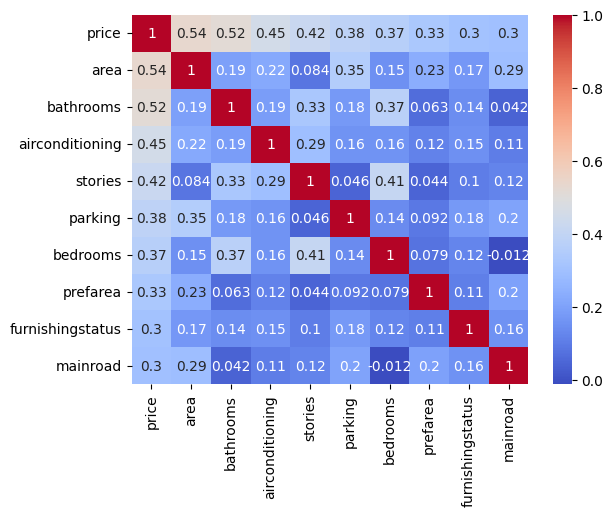

In [103]:
#plotting the heat map for the above data to easily see trend 

plt.Figure(figsize=(10,8))
sns.heatmap(corr_matrix.loc[top_columns,top_columns], annot=True, cmap='coolwarm')
plt.show()

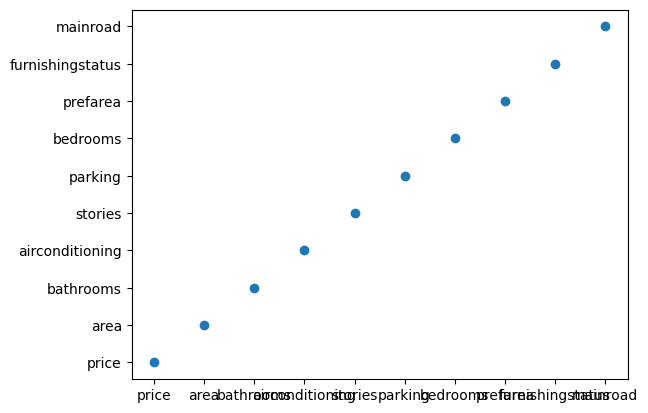

In [104]:

plt.scatter(top_columns,top_columns)
plt.show()

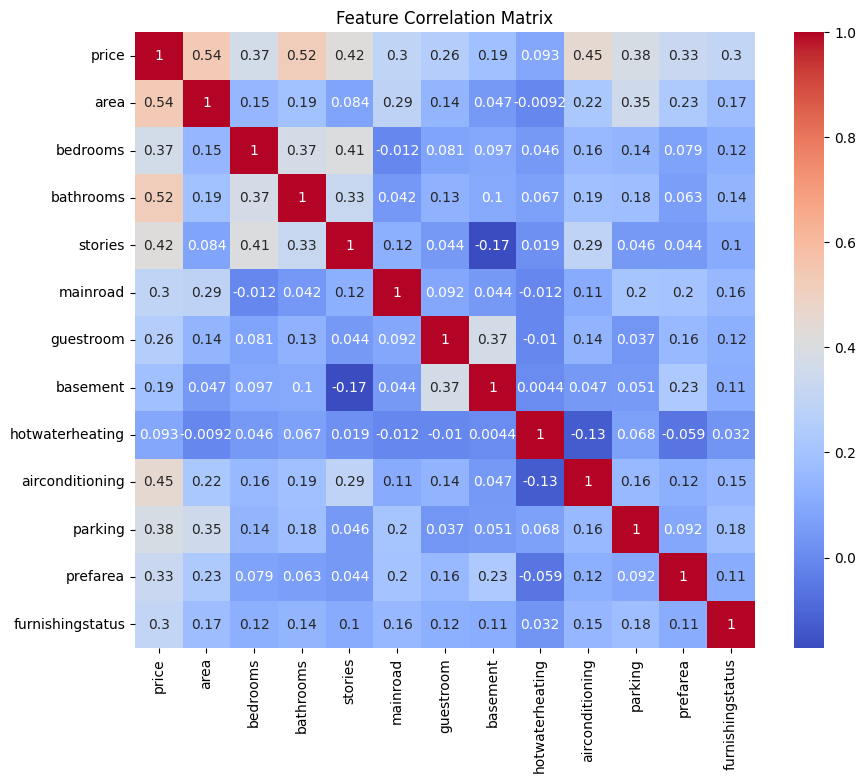

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

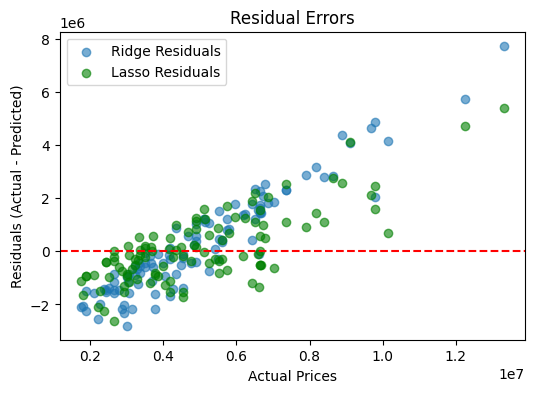

In [120]:
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred
plt.figure(figsize=(6,4))
plt.scatter(y_test, ridge_residuals, alpha=0.6, label="Ridge Residuals")
plt.scatter(y_test, lasso_residuals, alpha=0.6, label="Lasso Residuals", color='green')
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel("Actual Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Errors")
plt.legend()
plt.show()
